*Importing Libraries*

In [4]:
import pandas as pd
import nltk
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

*Importing CSV File*

In [5]:
file_path = 'reviews.csv'
df = pd.read_csv(file_path)

*Getting Common StopWords*

In [7]:
stop_words = set(stopwords.words('english'))
excluded_words = {"-", "it.", "ok."}

*Function to filter common stop words and manually excluded words from the reviews column*

In [8]:
def filter_stopwords(words, stop_words):
    return [word for word in words if word.lower() not in stop_words and word.lower() not in excluded_words]

*Converting **Rating** Column to **rating_number** which includes only numerical values*

In [9]:
# Convert ratings to numerical values
df['Rating'] = df['Rating'].astype(str)
df['rating_number'] = df['Rating'].str.extract(r'(\d+)').astype(int)

## Average Rating

In [10]:
# Calculate average rating
average_rating = df['rating_number'].mean()
print ("Average Rating of the restaurant is", average_rating)

Average Rating of the restaurant is 4.441666666666666


In [13]:
ratings_data = df['rating_number'].value_counts().sort_index()
ratings = ratings_data.index
counts = ratings_data.values

Text(0.5, 1.0, 'Total Number of Ratings from 1-5')

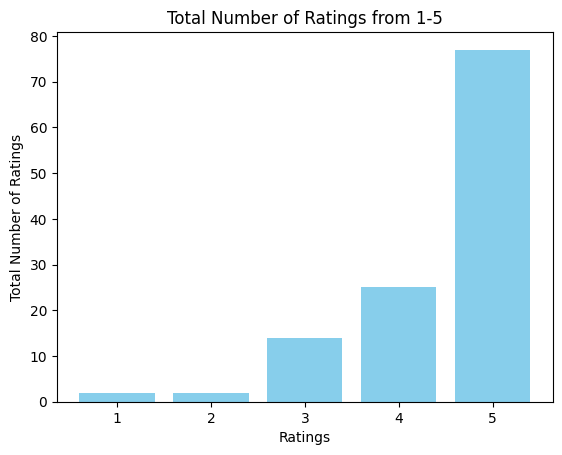

In [15]:
plt.bar(ratings, counts, color = 'skyblue')
plt.xlabel('Ratings')
plt.ylabel('Total Number of Ratings')
plt.title('Total Number of Ratings from 1-5')

*Identifying positive/negative comments*

In [69]:
# Identify common positive/negative comments
positive_comments = df[df['rating_number'] >= 4]['Review']
negative_comments = df[df['rating_number'] <= 2]['Review']

*Common positive and negative words found in the reviews*

In [70]:
from collections import Counter
positive_words = Counter(' '.join(positive_comments).split()).most_common(10)
negative_words = Counter(' '.join(negative_comments).split()).most_common(10)

print("Average Rating:", average_rating)
print("Common Positive Comments:", positive_words)
print("Common Negative Comments:", negative_words)

Average Rating: 4.441666666666666
Common Positive Comments: [('the', 482), ('and', 464), ('was', 316), ('a', 309), ('to', 228), ('I', 191), ('of', 184), ('for', 129), ('The', 128), ('with', 114)]
Common Negative Comments: [('a', 19), ('the', 18), ('and', 17), ('is', 13), ('was', 13), ('to', 10), ('I', 9), ('-', 8), ('with', 8), ('it', 7)]


*Filtering the common stopwords and manually excluded words from the comments*

In [71]:
positive_words_list = ' '.join(positive_comments).split()
negative_words_list = ' '.join(negative_comments).split()

filtered_positive_words = filter_stopwords(positive_words_list, stop_words)
filtered_negative_words = filter_stopwords(negative_words_list, stop_words)

positive_words_count = Counter(filtered_positive_words).most_common(10)
negative_words_count = Counter(filtered_negative_words).most_common(10)

print("Average Rating:", average_rating)
print("Common Positive Comments (Filtered):", positive_words_count)
print("Common Negative Comments (Filtered):", negative_words_count)

Average Rating: 4.441666666666666
Common Positive Comments (Filtered): [('clam', 52), ('chowder', 47), ('seafood', 44), ('good', 44), ('great', 43), ('restaurant', 42), ('crab', 39), ('food', 38), ('bread', 32), ('place', 32)]
Common Negative Comments (Filtered): [('waiter', 3), ('water', 3), ('cioppino', 2), ('Oyster', 2), ('spoon.', 2), ('oyster', 2), ('sauce', 2), ('Asked', 2), ('radish', 2), ('canned', 2)]


## Plotting common Positive and Negative words

In [72]:
def plot_word_counts(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words, palette='viridis')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.title(title)
    plt.show()

C:\Users\jayga\AppData\Local\Temp\ipykernel_11060\3183336470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


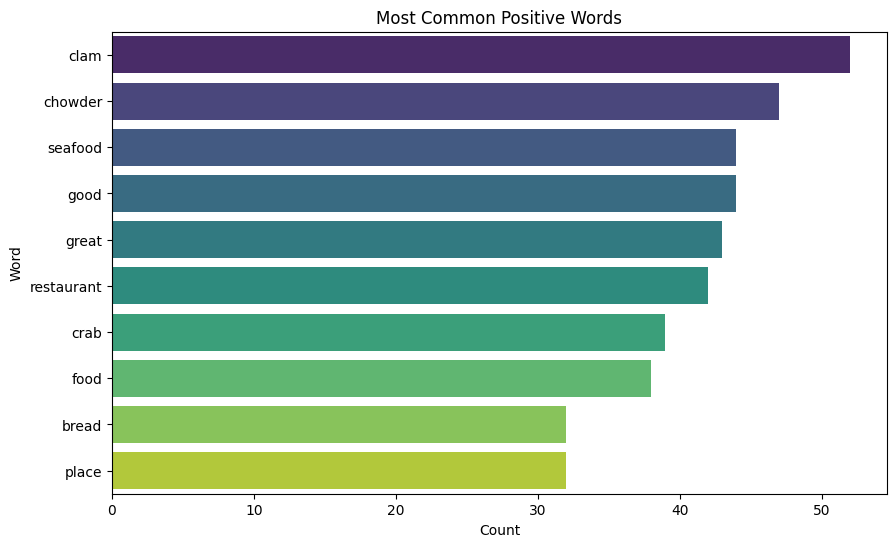

C:\Users\jayga\AppData\Local\Temp\ipykernel_11060\3183336470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


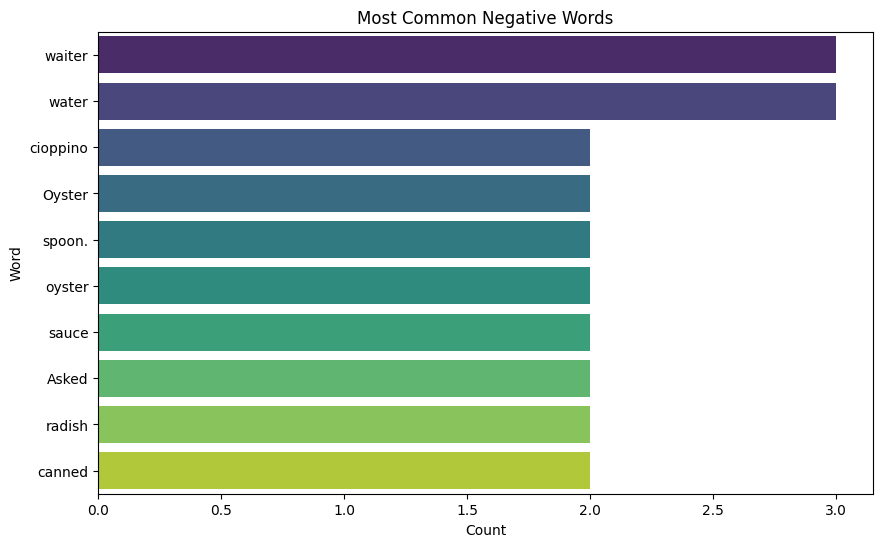

In [73]:
# Plotting
plot_word_counts(positive_words_count, 'Most Common Positive Words')
plot_word_counts(negative_words_count, 'Most Common Negative Words')